## 맨 아래 SUMMARY 있음

In [17]:
import warnings
warnings.filterwarnings(action='ignore')

import sklearn
import pandas as pd
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from konlpy.tag import Mecab

fm.findSystemFonts()
plt.rcParams['font.family']= ["NanumGothicCoding"]
plt.rcParams["axes.unicode_minus"]=False

import tensorflow as tf
import nltk
from sklearn.linear_model import SGDClassifier
from konlpy.tag import Mecab
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint,  ReduceLROnPlateau
from tensorflow.keras.regularizers import *
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam, RMSprop

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
#
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
train = pd.read_csv('spam.csv')
test = pd.read_csv('test.csv')

In [19]:
test['label'] = test['label'].map( {'spam': 1, 'ham': 0} ).astype(int)

## 결측치 제거

In [21]:
train.dropna(axis=0, inplace=True)
train['spam'] = train['label'].map( {'spam': 1, 'ham': 0} ).astype(int)
train.drop(['label'], axis=1, inplace=True)
train.head()

,text,spam
0,[Web발신]박춘규회원님손절주식은그만월급배만드는법http://lco.jp/eA,1
1,[Web발신]골든브릿지에서손실을보셨나요??http://bitly.kr/bRGtq[FW],1
2,[Web발신][대//박]가(.원)입코(WN)드MEP.com,1
3,[Web발신](광고)이정미님아직도주식하시나요http://pf.kakao.com/_u...,1
4,[Web발신]송승용님사람이모이는곳에는이유가있습니다하루~정보공개is.gd/JsJP,1


## 중복값 제거

In [ ]:
train = train.drop_duplicates()

## 불용어 사전

In [24]:
stop_df = pd.read_csv('한국어불용어100.txt', sep = '\t', header = None, names = ['형태','품사', '비율'])
stop_list = list(stop_df['형태'])

## 불용어 사전에 빈도수 높은 동일 단어 추가

In [25]:
stop_list_list = stop_list.copy()
tmp = ['Web발신', '발신', '광고', '무료', '거부']
for i in tmp:
    stop_list_list.append(i)
stop_list_list

['이',
 '있',
 '하',
 '것',
 '들',
 '그',
 '되',
 '수',
 '이',
 '보',
 '않',
 '없',
 '나',
 '사람',
 '주',
 '아니',
 '등',
 '같',
 '우리',
 '때',
 '년',
 '가',
 '한',
 '지',
 '대하',
 '오',
 '말',
 '일',
 '그렇',
 '위하',
 '때문',
 '그것',
 '두',
 '말하',
 '알',
 '그러나',
 '받',
 '못하',
 '일',
 '그런',
 '또',
 '문제',
 '더',
 '사회',
 '많',
 '그리고',
 '좋',
 '크',
 '따르',
 '중',
 '나오',
 '가지',
 '씨',
 '시키',
 '만들',
 '지금',
 '생각하',
 '그러',
 '속',
 '하나',
 '집',
 '살',
 '모르',
 '적',
 '월',
 '데',
 '자신',
 '안',
 '어떤',
 '내',
 '내',
 '경우',
 '명',
 '생각',
 '시간',
 '그녀',
 '다시',
 '이런',
 '앞',
 '보이',
 '번',
 '나',
 '다른',
 '어떻',
 '여자',
 '개',
 '전',
 '들',
 '사실',
 '이렇',
 '점',
 '싶',
 '말',
 '정도',
 '좀',
 '원',
 '잘',
 '통하',
 '소리',
 '놓',
 'Web발신',
 '발신',
 '광고',
 '무료',
 '거부']

In [ ]:
# 특수기호 제거
# train["text"] = train["text"].str.replace(pat=r'[^\w]', repl=r'', regex=True)

## 토큰화

In [ ]:
mecab = Mecab()

cv = CountVectorizer(tokenizer = mecab.nouns, stop_words = stop_list, turn).fit(train['text'])

x_train = cv.transform(train['text'])
x_test = cv.transform(test['text'])

## model: multinomial - 전처리 test 용도

In [ ]:
y_train = np.array(train['spam'])

In [ ]:
clf = MultinomialNB().fit(x_train, y_train)

In [ ]:
clf.score(x_train, y_train)

In [ ]:
pred = clf.predict(x_test)

In [ ]:
y_test = test['label']

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

## model: SGD (best⭐)

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(x_train, y_train)

In [ ]:
y_pred = sgd.predict(x_test)

In [ ]:
tmp = []
for y in y_pred:
    if y >= 0.5: tmp.append(1)
    else: tmp.append(0)

In [ ]:
print("prediction accuracy: {:.2f}".format(np.mean(tmp == y_test)))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, tmp))

## model: GradientBoosting (best⭐)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbt = GradientBoostingClassifier(n_estimators=1500, max_depth=10)
gbt.fit(x_train, y_train)

In [ ]:
y_pred = gbt.predict(x_test)

In [ ]:
print("prediction accuracy: {:.2f}".format(np.mean(y_pred == y_test)))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

---

## multinomial로 전처리 test 결과
- 중복 제거 + 결측치 ⇒ acc: 0.9322, f1-score: 0.91
- 중복 제거 + 결측치 + 불용어 + 빈도수많은거 ⇒ acc: 0.9319, f1-score: 0.90
- **중복 제거 + 결측치 + 불용어 ⇒ acc: 0.9348, f1-score: 0.91**
- 중복 제거 + 결측치 + 빈도수많은거 ⇒ acc: 0.9283, f1-score: 0.90
- 중복 제거 + 결측치 + 불용어 + 특수기호 제거 ⇒ acc: 0.9318, f1-score: 0.90
- 중복 제거 + 결측치 + 특수기호 제거 ⇒ acc: 0.9311, f1-score: 0.91
- 중복 제거 + 결측치 + 불용어 + 특수기호 제거 + 빈도수 많은거 ⇒ acc: 0.9294, f1-score: 0.90
- 중복 제거 + 결측치 + 특수기호 제거 + 빈도수 많은거 ⇒ acc: 0.9282, f1-score: 0.90

### 중복제거+결측치제거+불용어제거 한 성능이 best

### SGD: accuracy: 0.94 
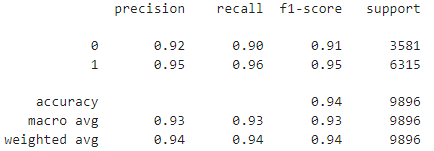

### GBT: accuracy: 0.94
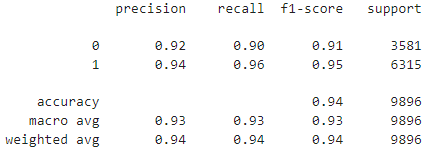